In [30]:
# Change to the desired directory
import os
from IPython import get_ipython

if __name__ == "__main__":
    # Specify the target directory
    target_dir = r"E:\Github\pneumonia_vs_normal_with_mlflow"

    # Use %cd to change directory
    get_ipython().run_line_magic('cd', target_dir)

E:\Github\pneumonia_vs_normal_with_mlflow


# Importing Libraries needed

In [31]:
import torch
from torch import nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
from torch.utils.data import DataLoader, Dataset

# Importing our DataFrames

In [32]:
df = pd.read_csv('E:\Github\pneumonia_vs_normal_with_mlflow\df_resized.csv')
df.head()

,img_path,clas,split,resized_path
0,data\chest_xray\test\NORMAL\IM-0001-0001.jpeg,0,test,data\chest_xray_resized\test\NORMAL\IM-0001-00...
1,data\chest_xray\test\NORMAL\IM-0003-0001.jpeg,0,test,data\chest_xray_resized\test\NORMAL\IM-0003-00...
2,data\chest_xray\test\NORMAL\IM-0005-0001.jpeg,0,test,data\chest_xray_resized\test\NORMAL\IM-0005-00...
3,data\chest_xray\test\NORMAL\IM-0006-0001.jpeg,0,test,data\chest_xray_resized\test\NORMAL\IM-0006-00...
4,data\chest_xray\test\NORMAL\IM-0007-0001.jpeg,0,test,data\chest_xray_resized\test\NORMAL\IM-0007-00...


In [33]:
df['clas'].value_counts()

clas
0    5606
1    4273
Name: count, dtype: int64

In [34]:
df.shape

(9879, 4)

# Creating the Objects needed to create the loader of our data

In [35]:
class XrayDataset(Dataset):
    def __init__(self, df_split, transform):
        self.df_split = df_split
        self.transform = transform

    def __len__(self):
        return len(self.df_split)

    def __getitem__(self, index):
        img_path = self.df_split.iloc[index]['resized_path']
        clas = self.df_split.iloc[index]['clas']
        # Load the image and convert it to grayscale
        image = Image.open(img_path).convert("L")

        img_trans = self.transform(image)

        return img_trans, clas

# Implementing our data into our loaders

### Training DataLoader

In [36]:
from torchvision.transforms import ToTensor, Normalize
train_dataset = XrayDataset(df_split=df[df['split'] == 'train'], 
                            transform = transforms.Compose([
    ToTensor(),
    Normalize([0.5], [0.5])
]))

# Create a DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

#### Visualizing samples from our train loader

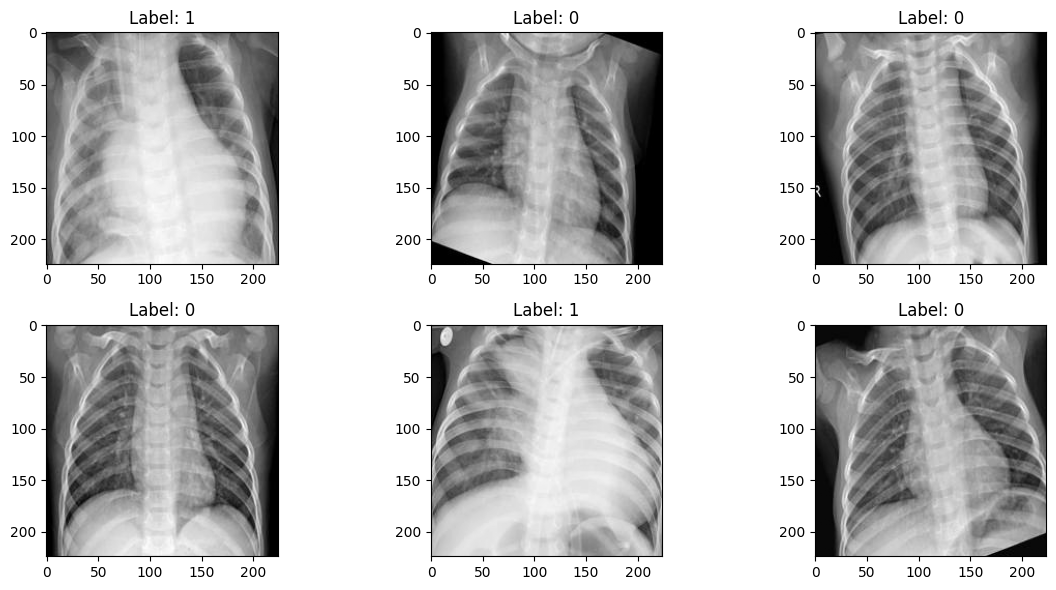

In [37]:
# Get one batch
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot 6 images
if __name__ == '__main__':

    plt.figure(figsize=(12, 6))
    for i in range(6):
        img = images[i]
        img = img.permute(1, 2, 0).numpy() 
        plt.subplot(2, 3, i + 1)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f"Label: {labels[i].item()}")
        plt.axis('on')
    plt.tight_layout()
    plt.show()

### Validation DataLoader

In [38]:
val_dataset = XrayDataset(df_split=df[df['split'] == 'val'],
                           transform=transforms.Compose([
                               ToTensor(),
                               Normalize([0.5], [0.5])
                           ]))
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True)

### Test DataLoader

In [39]:
test_dataset = XrayDataset(df_split=df[df['split'] == 'test'], 
                           transform=transforms.Compose([
                               ToTensor(),
                                 Normalize([0.5], [0.5])
                               ]))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)